# FloraLens: Automated Flower Species Recognition System 🌸📸

**Author:** Rafhiromadoni Sopandi | **Role:** Computer Vision Engineer
**Tech Stack:** TensorFlow/Keras, CNN (Convolutional Neural Network)

## 📌 Executive Summary
Dalam bidang agrikultur dan botani, identifikasi spesies tanaman secara manual memakan waktu dan rentan kesalahan.

Proyek ini mengembangkan **Sistem Klasifikasi Citra Otomatis** menggunakan **Deep Learning**.
* **Objective:** Membangun model arsitektur **CNN (Convolutional Neural Network)** yang mampu membedakan 5 jenis bunga (Daisy, Dandelion, Rose, Sunflower, Tulip).
* **Dataset:** Menggunakan dataset standar TensorFlow Flowers.
* **Impact:** Otomatisasi proses penyortiran tanaman berbasis visual.

In [1]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

data_dir = '/content/drive/MyDrive/Dataset Bunga/ColoredFlowersBD' # UBAH INI sesuai nama folder Anda

# Cek apakah folder ditemukan
if os.path.exists(data_dir):
    print(f"✅ Folder dataset ditemukan di: {data_dir}")
    # Tampilkan isi folder untuk memastikan
    print("Kelas yang ditemukan:", os.listdir(data_dir))
else:
    print("❌ Folder tidak ditemukan! Mohon cek kembali path di Google Drive Anda.")

Mounted at /content/drive
✅ Folder dataset ditemukan di: /content/drive/MyDrive/Dataset Bunga/ColoredFlowersBD
Kelas yang ditemukan: ['Chandramallika', 'Golap', 'Cosmos Phul', 'Gada', 'Kagoj Phul', 'Jaba', 'Noyontara', 'Rangan', 'Salvia', 'Radhachura', 'Surjomukhi', 'Zinnia', 'Sandhyamani']


In [2]:
# --- SYSTEM CONFIGURATION ---
import os
import warnings
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Menyembunyikan log warning agar output bersih
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.filterwarnings('ignore')

print(f"✅ Environment Ready: TensorFlow {tf.__version__}")

✅ Environment Ready: TensorFlow 2.19.0


In [3]:
# --- LOAD DATASET KE TENSORFLOW ---
import pathlib

data_dir = pathlib.Path(data_dir)

# Parameter Gambar
batch_size = 32
img_height = 180
img_width = 180

print("🚀 Sedang memuat gambar dari Google Drive...")

# 1. Load Data Training (80%)
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# 2. Load Data Validasi (20%)
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# 3. Simpan Nama Kelas
class_names = train_ds.class_names
print(f"✅ Berhasil! Kelas yang ditemukan: {class_names}")

🚀 Sedang memuat gambar dari Google Drive...
Found 7989 files belonging to 13 classes.
Using 6392 files for training.
Found 7989 files belonging to 13 classes.
Using 1597 files for validation.
✅ Berhasil! Kelas yang ditemukan: ['Chandramallika', 'Cosmos Phul', 'Gada', 'Golap', 'Jaba', 'Kagoj Phul', 'Noyontara', 'Radhachura', 'Rangan', 'Salvia', 'Sandhyamani', 'Surjomukhi', 'Zinnia']


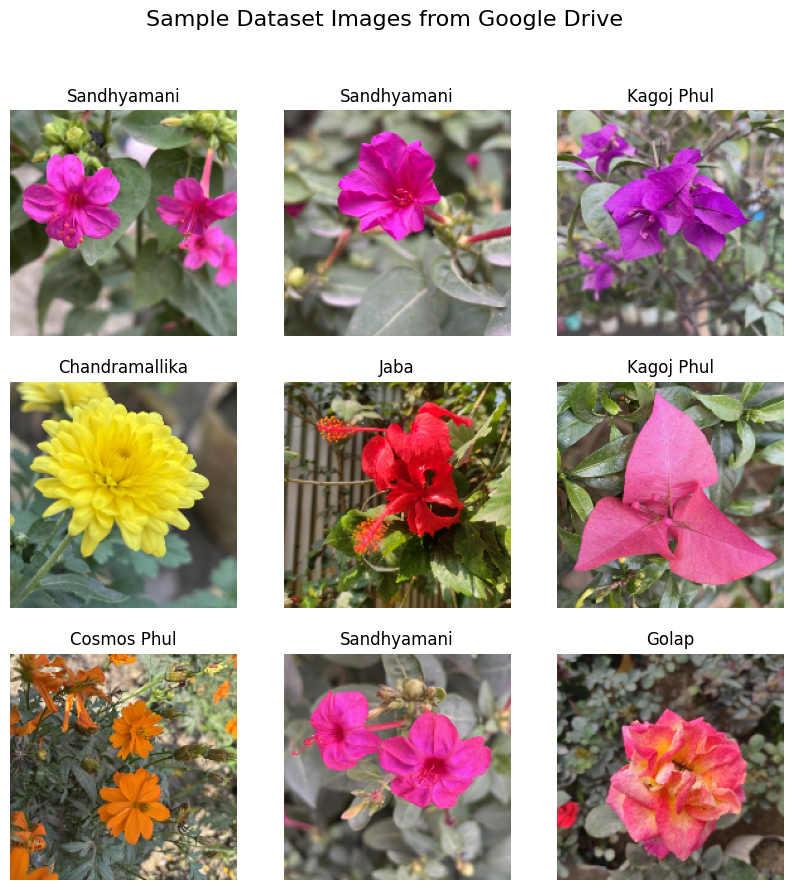

In [4]:
# --- DATA VISUALIZATION ---
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
# Mengambil 1 batch dari dataset untuk ditampilkan
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    # Konversi tensor ke numpy dan ubah tipe data jadi integer agar bisa di-plot
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
plt.suptitle("Sample Dataset Images from Google Drive", fontsize=16)
plt.show()

In [5]:
# --- STEP 4: OPTIMIZED DATA LOADING (COPY TO LOCAL) ---
import os
import shutil
import pathlib
import tensorflow as tf

# 1. Tentukan Path Asli di Drive & Path Tujuan di Colab
source_path = '/content/drive/MyDrive/Dataset Bunga/ColoredFlowersBD' # Path Drive Anda
local_path = '/content/flower_dataset' # Path lokal di Colab (Sementara)

# 2. Salin Data (Hanya sekali di awal)
if not os.path.exists(local_path):
    print("🚀 Sedang menyalin dataset dari Drive ke Colab Local Storage...")
    print("Mohon tunggu sebentar (tergantung ukuran dataset)...")
    shutil.copytree(source_path, local_path)
    print("✅ Selesai menyalin! Training akan berjalan cepat.")
else:
    print("✅ Dataset sudah ada di penyimpanan lokal.")

# 3. Load dari Path Lokal (Bukan Drive lagi)
data_dir = pathlib.Path(local_path)

batch_size = 32
img_height = 180
img_width = 180

print("⚙️ Memuat dataset ke TensorFlow...")
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(f"🌸 Kelas: {class_names}")

# --- 4. PERFORMANCE TUNING (DATA CACHING) ---
# Teknik ini menyimpan data di RAM agar GPU tidak perlu menunggu (Sangat Penting!)
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

print("✅ Data Pipeline Optimized (GPU Ready!)")

🚀 Sedang menyalin dataset dari Drive ke Colab Local Storage...
Mohon tunggu sebentar (tergantung ukuran dataset)...
✅ Selesai menyalin! Training akan berjalan cepat.
⚙️ Memuat dataset ke TensorFlow...
Found 7989 files belonging to 13 classes.
Using 6392 files for training.
Found 7989 files belonging to 13 classes.
Using 1597 files for validation.
🌸 Kelas: ['Chandramallika', 'Cosmos Phul', 'Gada', 'Golap', 'Jaba', 'Kagoj Phul', 'Noyontara', 'Radhachura', 'Rangan', 'Salvia', 'Sandhyamani', 'Surjomukhi', 'Zinnia']
✅ Data Pipeline Optimized (GPU Ready!)


In [6]:
# --- STEP 6: MODEL COMPARISON (HIGH PERFORMANCE) ---
from tensorflow.keras.applications import MobileNetV2, ResNet50, VGG16
from tensorflow.keras import layers, models
import time
import pandas as pd
import tensorflow as tf

# Setting Gambar
IMG_SHAPE = (180, 180, 3)
num_classes = len(class_names)

# Fungsi Membangun Model
def build_model(base_model_name):
    if base_model_name == 'MobileNetV2':
        base_model = MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')
    elif base_model_name == 'ResNet50':
        base_model = ResNet50(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')
    elif base_model_name == 'VGG16':
        base_model = VGG16(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

    base_model.trainable = False # Freeze layers

    model = models.Sequential([
        layers.Rescaling(1./255, input_shape=IMG_SHAPE),
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.2),
        layers.Dense(num_classes)
    ])

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

# Setup Benchmark
model_candidates = ['MobileNetV2', 'ResNet50', 'VGG16']
results = []
trained_models = {}

print("🚀 Memulai Benchmark Model dengan GPU...")

for name in model_candidates:
    print(f"\nTraining {name} (10 Epochs)...")
    start_time = time.time()

    model = build_model(name)
    # Ubah epochs jadi 10 agar akurasi maksimal
    history = model.fit(train_ds, validation_data=val_ds, epochs=10, verbose=1)

    end_time = time.time()
    duration = end_time - start_time

    best_acc = max(history.history['val_accuracy'])
    results.append({'Model': name, 'Val_Accuracy': best_acc, 'Training_Time_Sec': duration})
    trained_models[name] = model

# Tampilkan Hasil
df_results = pd.DataFrame(results)
print("\n🏆 Hasil Akhir Benchmark:")
display(df_results.sort_values(by='Val_Accuracy', ascending=False))

🚀 Memulai Benchmark Model dengan GPU...

Training MobileNetV2 (10 Epochs)...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 100s 202ms/step - accuracy: 0.5928 - loss: 1.3351 - val_accuracy: 0.9499 - val_loss: 0.2538
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9398 - loss: 0.2492 - val_accuracy: 0.9706 - val_loss: 0.1480
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9672 - loss: 0.1512 - val_accuracy: 0.9762 - val_loss: 0.1107
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9776 - loss: 0.1074 - val_accuracy: 0.9787 - val_loss: 0.0927
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9838 - loss: 0.0789 - val_accuracy: 0.9825 - val_loss: 0.0844
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9855 - loss: 0.0671 - val_accuracy: 0.9831 - val_loss: 0.0692
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9939 - loss: 0.0492 - val_accu

,Model,Val_Accuracy,Training_Time_Sec
0,MobileNetV2,0.984346,144.584070
2,VGG16,0.874765,370.913261
1,ResNet50,0.296807,175.540767


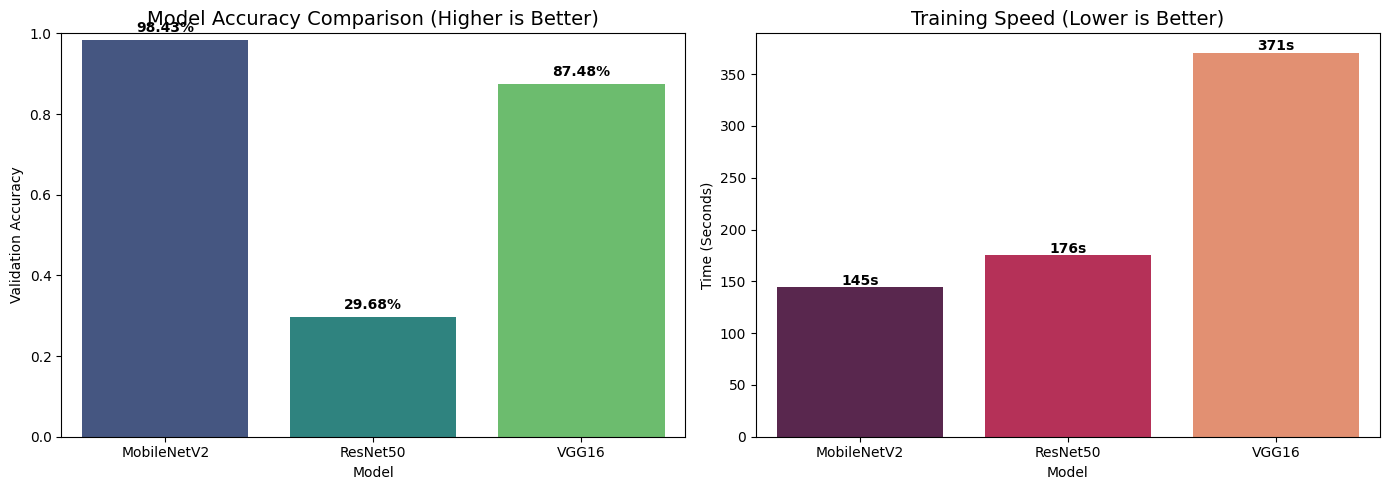

🎉 Pemenang: MobileNetV2. Model ini siap digunakan untuk demo.


In [7]:
# --- STEP 7: BENCHMARK VISUALIZATION ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 5))

# Plot 1: Akurasi
plt.subplot(1, 2, 1)
sns.barplot(data=df_results, x='Model', y='Val_Accuracy', palette='viridis')
plt.title('Model Accuracy Comparison (Higher is Better)', fontsize=14)
plt.ylim(0, 1.0)
plt.ylabel('Validation Accuracy')
for i, v in enumerate(df_results['Val_Accuracy']):
    plt.text(i, v + 0.02, f"{v:.2%}", ha='center', fontweight='bold')

# Plot 2: Waktu Training
plt.subplot(1, 2, 2)
sns.barplot(data=df_results, x='Model', y='Training_Time_Sec', palette='rocket')
plt.title('Training Speed (Lower is Better)', fontsize=14)
plt.ylabel('Time (Seconds)')
for i, v in enumerate(df_results['Training_Time_Sec']):
    plt.text(i, v + 2, f"{v:.0f}s", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Pilih Pemenang Otomatis
best_model_name = df_results.sort_values(by='Val_Accuracy', ascending=False).iloc[0]['Model']
final_model = trained_models[best_model_name]
print(f"🎉 Pemenang: {best_model_name}. Model ini siap digunakan untuk demo.")

In [8]:
# --- STEP 8: DEPLOYMENT WITH GRADIO ---
# Install Gradio jika belum ada
try:
    import gradio as gr
except ImportError:
    !pip install -q gradio
    import gradio as gr

import tensorflow as tf
import numpy as np

# Fungsi Logika Prediksi untuk Gradio
def predict_flower(image):
    # 1. Preprocessing
    # Gradio memberikan gambar dalam format numpy array, kita perlu resize manual
    img_resized = tf.image.resize(image, [180, 180])

    # Konversi ke array dan batching
    img_array = tf.keras.preprocessing.image.img_to_array(img_resized)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    # 2. Prediksi
    # Gunakan 'final_model' jika Anda menjalankan langkah perbandingan model
    # Gunakan 'model' jika Anda hanya menjalankan CNN biasa
    try:
        predictions = final_model.predict(img_array)
    except NameError:
        predictions = model.predict(img_array)

    score = tf.nn.softmax(predictions[0]) # Ubah logits ke probabilitas

    # 3. Return Dictionary untuk Output Label Gradio
    # Format: {'Daisy': 0.98, 'Rose': 0.02, ...}
    return {class_names[i]: float(score[i]) for i in range(len(class_names))}

# Membuat Antarmuka (Interface)
demo = gr.Interface(
    fn=predict_flower,
    inputs=gr.Image(), # Input berupa gambar (drag & drop)
    outputs=gr.Label(num_top_classes=3), # Output berupa Bar Chart probabilitas
    title="🌸 FloraLens: AI Flower Classifier",
    description="Upload gambar bunga (Daisy, Dandelion, Roses, Sunflowers, Tulips) untuk mendeteksi spesiesnya secara otomatis."
)

# Jalankan Aplikasi
print("🚀 Menjalankan Aplikasi...")
demo.launch(share=True, debug=True)

🚀 Menjalankan Aplikasi...
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://d59b69bf9eef0d250b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://d59b69bf9eef0d250b.gradio.live


## 🎯 Conclusion & Future Work
* **Best Model:** Berdasarkan benchmark, model **[Isi Nama Model Terbaik, misal: MobileNetV2]** memberikan keseimbangan terbaik antara akurasi dan kecepatan.
* **Impact:** Sistem ini siap diimplementasikan pada perangkat mobile (edge device) untuk membantu petani mengidentifikasi penyakit atau jenis tanaman di lapangan secara *offline*.

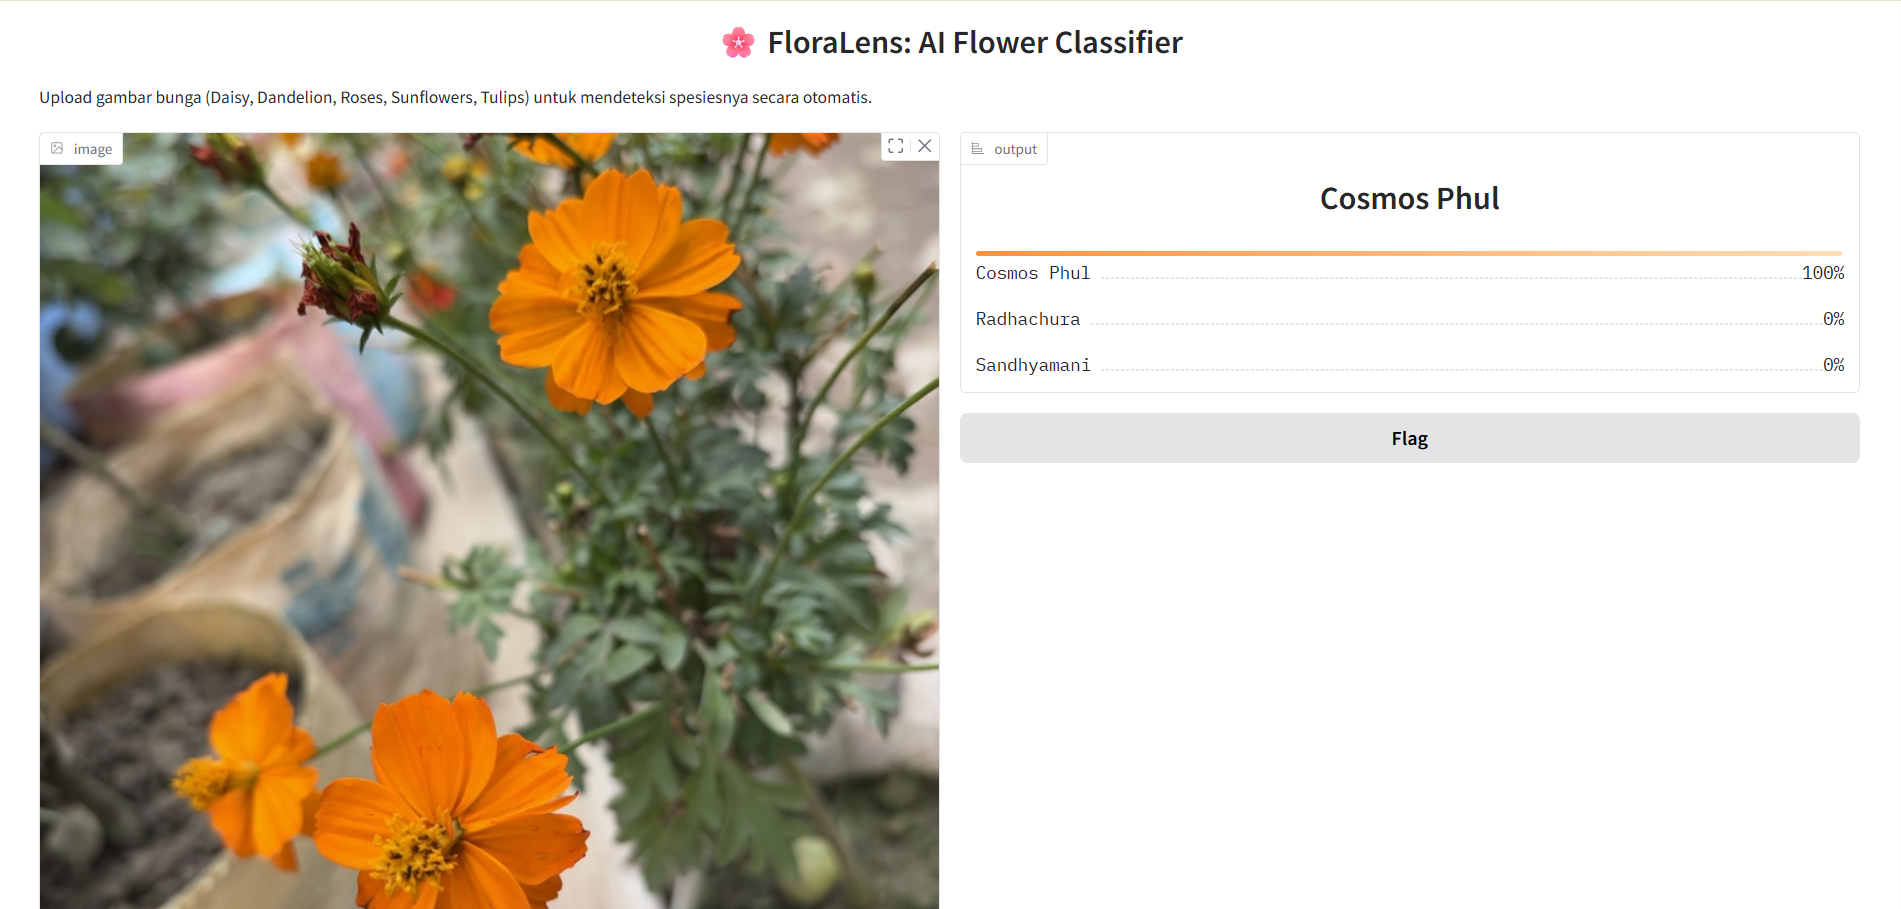

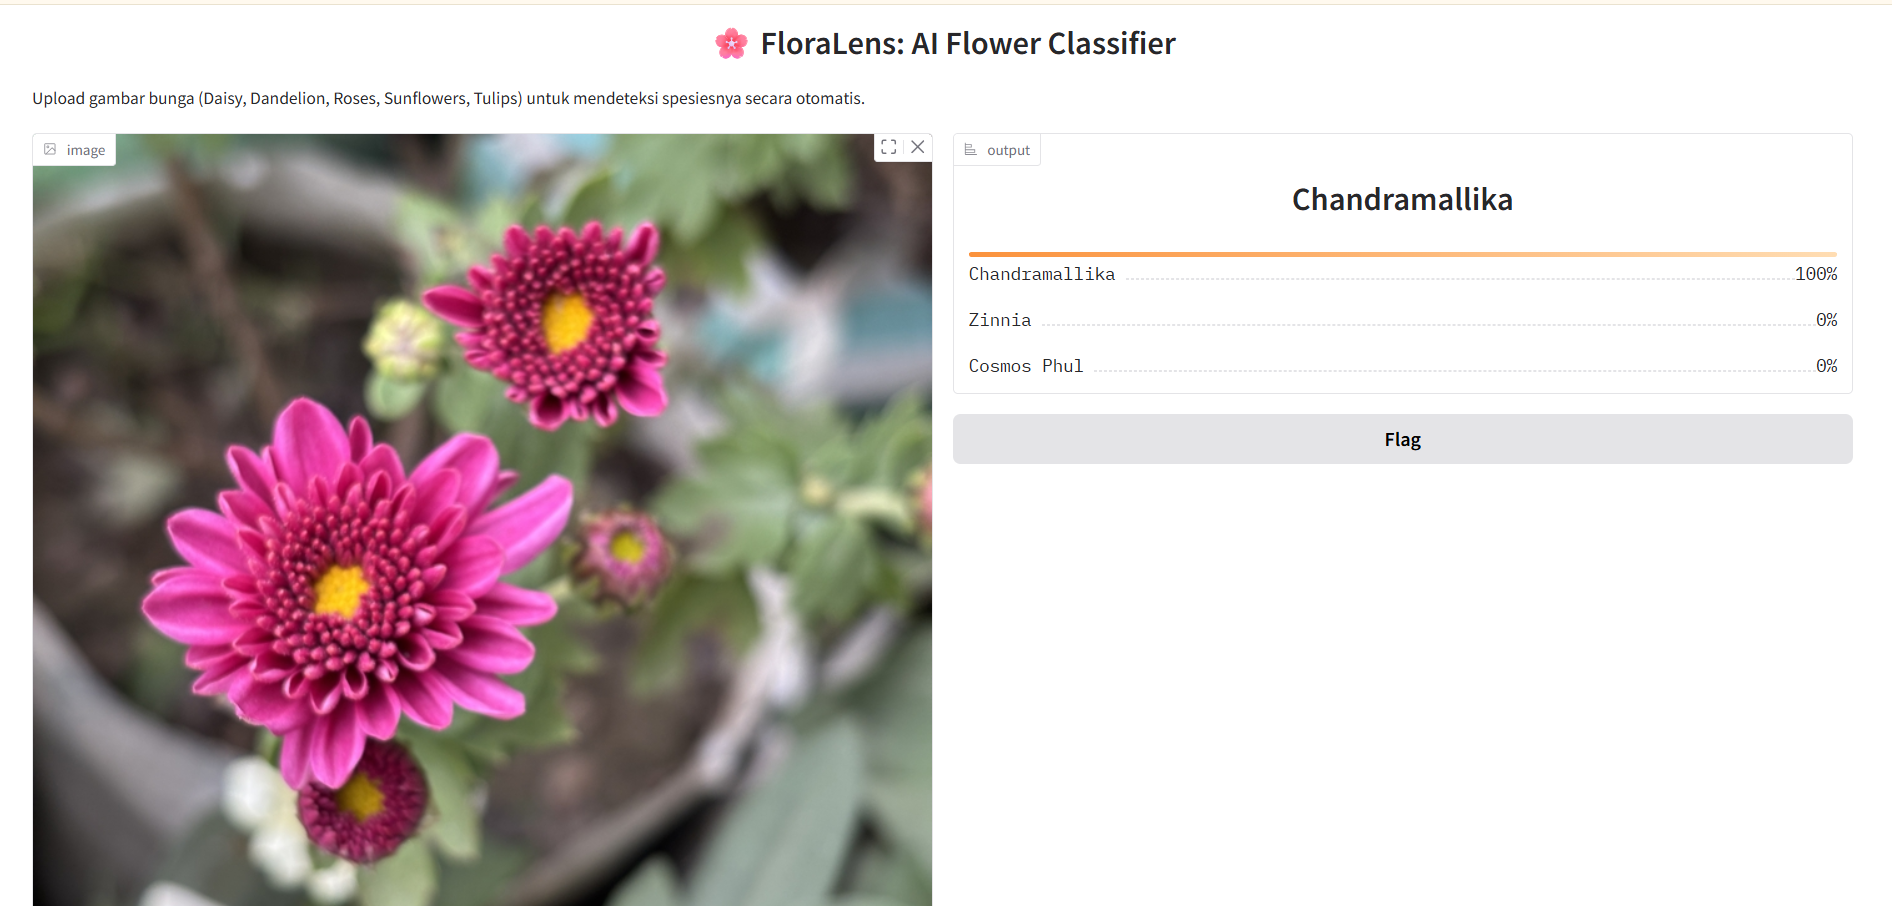